In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Concrete=pd.read_csv('C:\\Users\\mchil\\Downloads\\Python batch\\Python Pred Modeling All notebooks + Datasets\\Python Datasets\\Regression Datasets\\ConcreteStrengthData.csv')
Concrete.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
Concrete.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [4]:
Concrete.duplicated().sum()
print(Concrete.shape)
Concrete.drop_duplicates(inplace=True)
print(Concrete.shape)

(1030, 9)
(1005, 9)


#### Variables analysis
* Target:-Strength
* predictors:-'CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent','WaterComponent', 'SuperplasticizerComponent',   'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'

<AxesSubplot:>

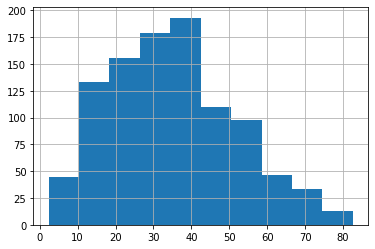

In [5]:
Concrete['Strength'].hist()

In [6]:
Concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1005 non-null   float64
 1   BlastFurnaceSlag           1005 non-null   float64
 2   FlyAshComponent            1005 non-null   float64
 3   WaterComponent             1005 non-null   float64
 4   SuperplasticizerComponent  1005 non-null   float64
 5   CoarseAggregateComponent   1005 non-null   float64
 6   FineAggregateComponent     1005 non-null   float64
 7   AgeInDays                  1005 non-null   int64  
 8   Strength                   1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [7]:
Concrete.describe(include='all')

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
Concrete['AgeInDays'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

* Continuous :- all
* target :- Strength

### Univariate Analysis

array([[<AxesSubplot:title={'center':'CementComponent '}>,
        <AxesSubplot:title={'center':'BlastFurnaceSlag'}>,
        <AxesSubplot:title={'center':'FlyAshComponent'}>],
       [<AxesSubplot:title={'center':'WaterComponent'}>,
        <AxesSubplot:title={'center':'SuperplasticizerComponent'}>,
        <AxesSubplot:title={'center':'CoarseAggregateComponent'}>],
       [<AxesSubplot:title={'center':'FineAggregateComponent'}>,
        <AxesSubplot:title={'center':'AgeInDays'}>,
        <AxesSubplot:title={'center':'Strength'}>]], dtype=object)

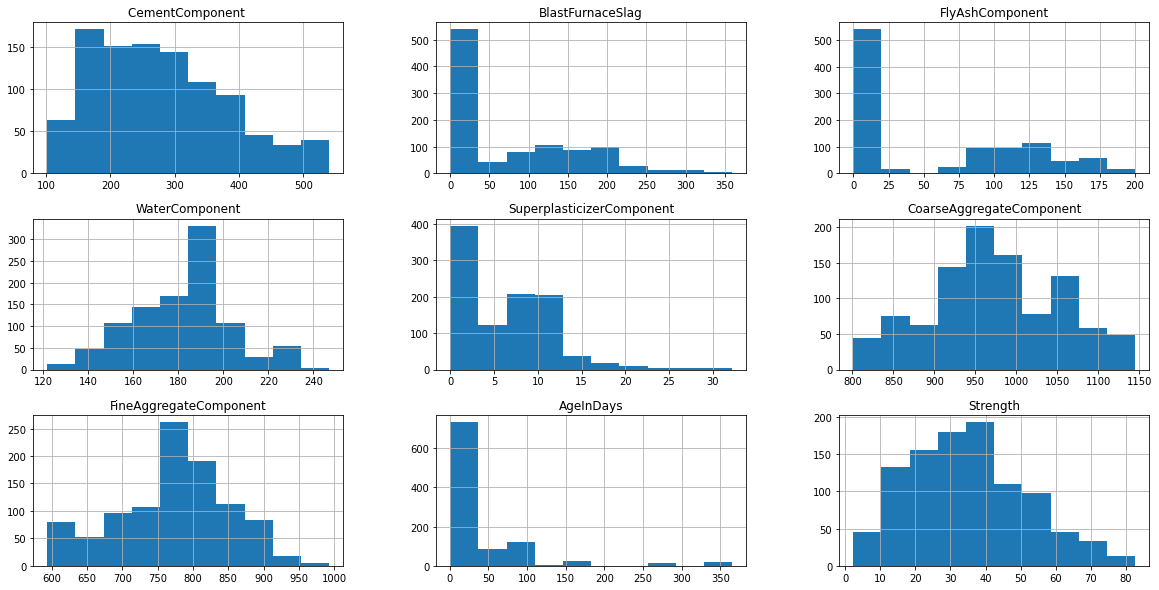

In [9]:
Concrete.hist(figsize=(20,10))

In [10]:
# AgeInDays is skewed but thick Tailed hence acceptable



### Bivariate analysis

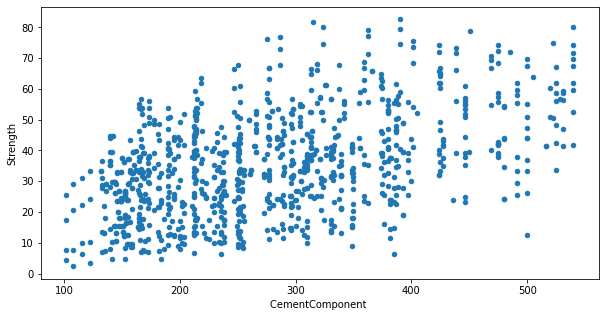

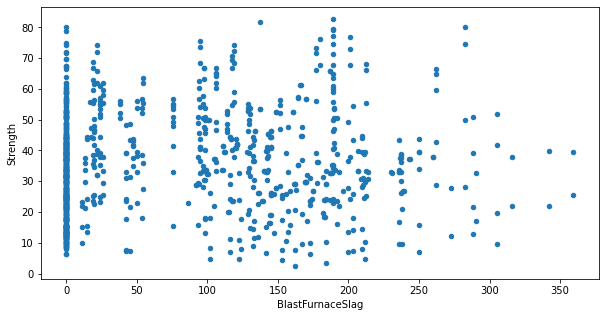

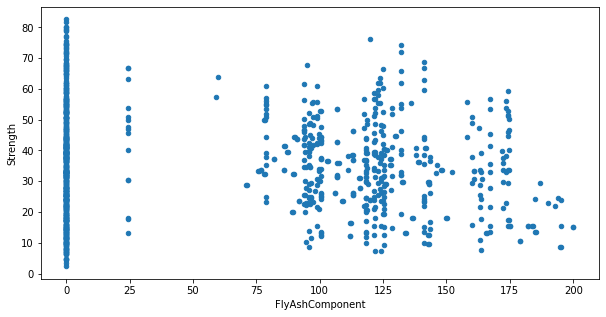

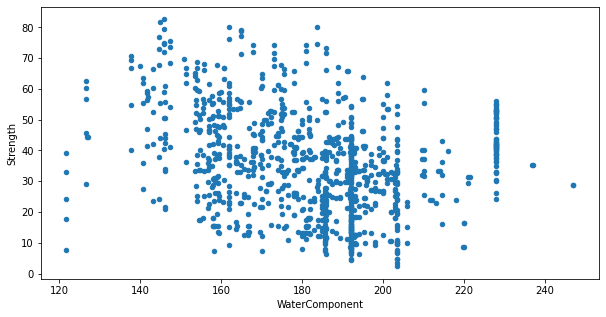

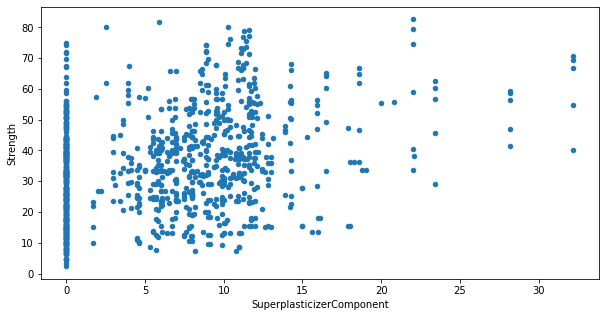

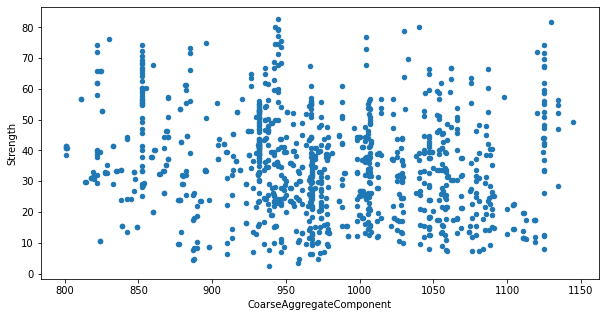

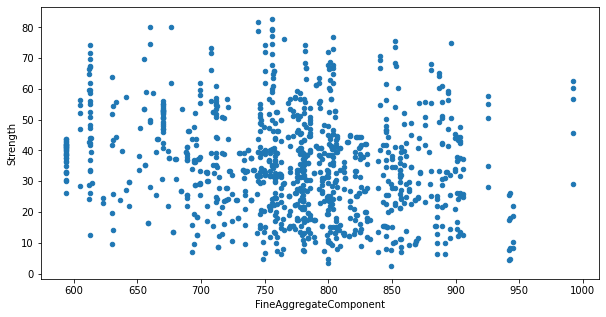

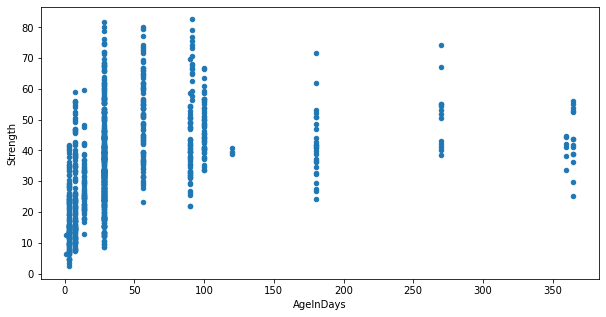

In [11]:
cols=list(Concrete.columns)
cols.remove('Strength')

for i in cols :
    Concrete.plot.scatter(x=i,y='Strength',figsize=(10,5))


In [12]:
Concrete.corr()['Strength']

CementComponent              0.488283
BlastFurnaceSlag             0.103374
FlyAshComponent             -0.080648
WaterComponent              -0.269624
SuperplasticizerComponent    0.344209
CoarseAggregateComponent    -0.144717
FineAggregateComponent      -0.186448
AgeInDays                    0.337367
Strength                     1.000000
Name: Strength, dtype: float64

In [14]:
Concrete.corr()['Strength'][abs(Concrete.corr()['Strength'])>0.3]

CementComponent              0.488283
SuperplasticizerComponent    0.344209
AgeInDays                    0.337367
Strength                     1.000000
Name: Strength, dtype: float64

* Selected variables:- CementComponent,SuperplasticizerComponent,AgeInDays
* Target :- Strength

### Extracting selected variables and Preparing Data For ML


In [20]:
Predictors=['CementComponent ','SuperplasticizerComponent','AgeInDays']
Target='Strength'

ConcreteML=Concrete[Predictors]
ConcreteML[Target]=Concrete[Target]
ConcreteML.head()



,CementComponent,SuperplasticizerComponent,AgeInDays,Strength
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30


In [26]:
X=ConcreteML[Predictors].values
y=ConcreteML[Target].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X=MinMaxScaler().fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(703, 3)
(302, 3)
(703,)
(302,)


### Multiple Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

LR=LinearRegression()

LR.fit(X_train,y_train)

print("R2 score of fitted model is :- ",metrics.r2_score(y_train,LR.predict(X_train)))
print('----------------------------------------------------------------------------------')

predLR=LR.predict(X_test)

TestResultLR=pd.DataFrame(X_test,columns=Predictors)
TestResultLR[Target]=y_test
TestResultLR[Target+'_Predicted']=np.round(predLR)
# APE
TestResultLR['APE']=(np.abs(TestResultLR[Target]-TestResultLR[Target+'_Predicted'])/TestResultLR[Target])*100

# MAPE
MAPE=TestResultLR['APE'].mean()
# MedAPE
MedAPE=TestResultLR['APE'].median()

print("Prediction Results on Test Data :- \n")

print(TestResultLR[['Strength','Strength_Predicted','APE']],'\n')
print('----------------------------------------------------------------------------------')
print("Mean Accuracy of Model is :- ",100-MAPE)
print("Median Accuracy of Model is :- ",100-MedAPE)


R2 score of fitted model is :-  0.4890314771936314
----------------------------------------------------------------------------------
Prediction Results on Test Data :- 

     Strength  Strength_Predicted         APE
0       19.01                27.0   42.030510
1       24.29                16.0   34.129271
2       26.32                24.0    8.814590
3       34.57                38.0    9.921898
4       44.13                45.0    1.971448
..        ...                 ...         ...
297      6.47                22.0  240.030912
298     44.87                35.0   21.996880
299     52.30                35.0   33.078394
300     36.45                34.0    6.721536
301     56.50                57.0    0.884956

[302 rows x 3 columns] 

----------------------------------------------------------------------------------
Mean Accuracy of Model is :-  60.49351199213497
Median Accuracy of Model is :-  75.08504661930615


#### Cross Validation 

In [37]:
def MAPE_score(orig,pred):
    APE=(np.abs(orig-pred)/orig)*100
    MAPE=np.mean(APE)
    return 100-MAPE

scorer=make_scorer(MAPE_score,greater_is_better=True)

CV=cross_val_score(LR,X,y,cv=10,scoring=scorer)

print(CV,"\nFinal Mean Accuracy of Model is :- ",np.mean(CV))


[66.11624942 68.98716338 66.13454779 66.25073037 70.39528526 48.94465308
 41.5930605  57.14493174 63.19198007 62.96157721] 
Final Mean Accuracy of Model is :-  61.172017880646614


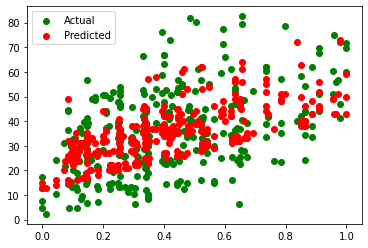

Coef:- [29.39666179 34.94359092 34.2228584 ] Intercept:- 12.53682417554478


In [95]:
plt.scatter(x=TestResultLR['CementComponent '],y=TestResultLR['Strength'],color='green')
plt.scatter(x=TestResultLR['CementComponent '],y=TestResultLR['Strength_Predicted'],color='red')
plt.legend(['Actual','Predicted'])
plt.show()
print("Coef:-",LR.coef_,"Intercept:-",LR.intercept_)


### Decision Trees

In [68]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor(max_depth=9,criterion='mse')
DT.fit(X_train,y_train)

print("R2 score of fitted model is :- ",metrics.r2_score(y_train,DT.predict(X_train)))
print('----------------------------------------------------------------------------------')

predDT=DT.predict(X_test)

TestResultDT=pd.DataFrame(X_test,columns=Predictors)
TestResultDT[Target]=y_test
TestResultDT[Target+'_Predicted']=np.round(predDT)
# APE
TestResultDT['APE']=(np.abs(TestResultDT[Target]-TestResultDT[Target+'_Predicted'])/TestResultDT[Target])*100

# MAPE
MAPE=TestResultDT['APE'].mean()
# MedAPE
MedAPE=TestResultDT['APE'].median()

print("Prediction Results on Test Data :- \n")

print(TestResultDT[['Strength','Strength_Predicted','APE']],'\n')
print('----------------------------------------------------------------------------------')
print("Mean Accuracy of Model is :- ",100-MAPE)
print("Median Accuracy of Model is :- ",100-MedAPE)


    

R2 score of fitted model is :-  0.9187195117721165
----------------------------------------------------------------------------------
Prediction Results on Test Data :- 

     Strength  Strength_Predicted        APE
0       19.01                23.0  20.988953
1       24.29                22.0   9.427748
2       26.32                43.0  63.373860
3       34.57                34.0   1.648828
4       44.13                46.0   4.237480
..        ...                 ...        ...
297      6.47                11.0  70.015456
298     44.87                45.0   0.289726
299     52.30                44.0  15.869981
300     36.45                35.0   3.978052
301     56.50                53.0   6.194690

[302 rows x 3 columns] 

----------------------------------------------------------------------------------
Mean Accuracy of Model is :-  77.58571612211647
Median Accuracy of Model is :-  85.48313433809616


Features Importances are :- 



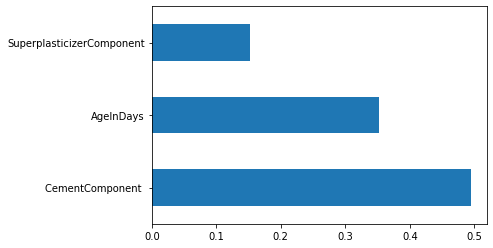

[76.37560723 76.29608069 75.93118475 76.80141949 79.00575533 66.46678925
 67.99828294 76.76860581 77.043874   76.65760371] 
Final Mean Accuracy of Model is :-  74.93452032042765


In [69]:
features=pd.Series(DT.feature_importances_,index=Predictors)
features.nlargest(10).plot(kind='barh')
print("Features Importances are :- \n")
plt.show()

scorer2=make_scorer(MAPE_score,greater_is_better=True)

CV2=cross_val_score(DT,X,y,cv=10,scoring=scorer)

print(CV2,"\nFinal Mean Accuracy of Model is :- ",np.mean(CV2))


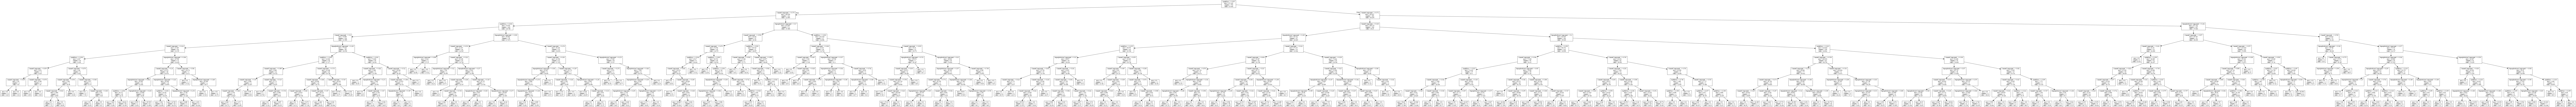

In [71]:
import pydotplus
from IPython.display import Image
from sklearn import tree

dot_tree=tree.export_graphviz(DT,out_file=None,feature_names=Predictors,class_names=Target)

# print(dot_tree)

graph=pydotplus.graph_from_dot_data(dot_tree)

Image(graph.create_png(),width=10000,height=10000)

In [73]:
# image=plt.gcf()
# image.savefig('ConcreteTree.png')
